# PLA and MLP

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Import data

In [15]:
dataset = pd.read_csv(r"Breast_cancer_data.csv")
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
print(dataset.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [16]:
print(dataset.tail())

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
564          0  
565          0  
566          0  
567          0  
568          1  


In [17]:
print(dataset.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


In [18]:
print(dataset.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


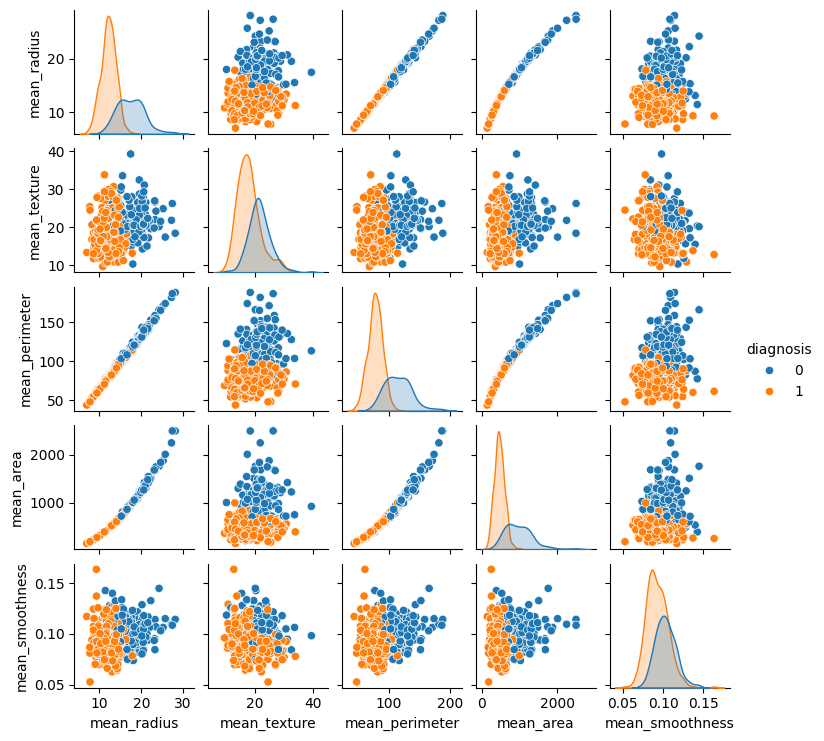

In [19]:
sns.pairplot(dataset.select_dtypes(['number']), hue='diagnosis', height=1.5)

## Comparison

<div>
<center>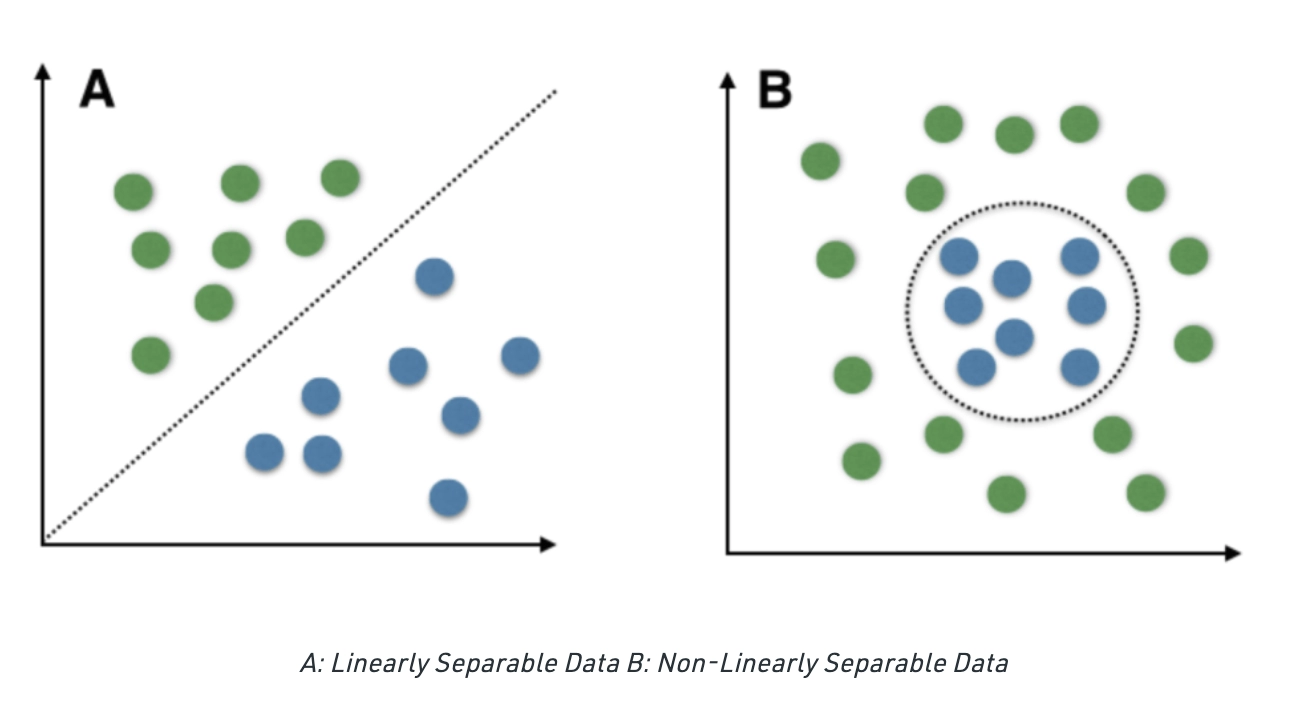</center>
</div>

Our dataset from the pairplot is not linearly separable. A linear model like the single perceptron learning algorithm might not be sufficient to achieve high accuracy in classification. 

In [20]:
dataset.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

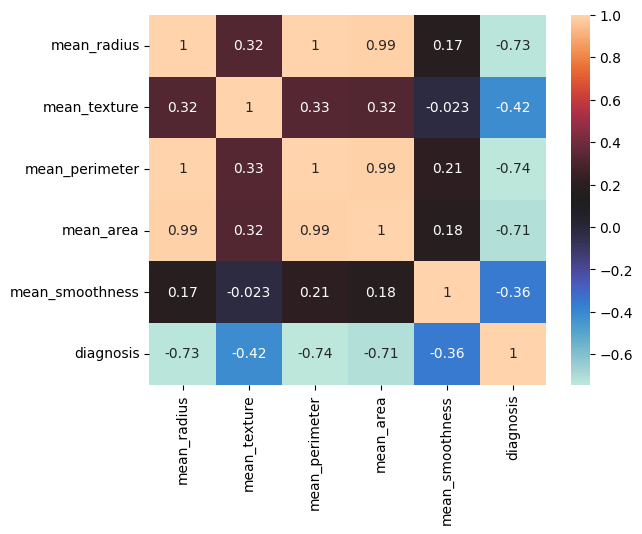

In [21]:
sns.heatmap(dataset.corr(), annot=True, cmap="icefire")

## Split the Data

In [22]:
# Get features excluding the last one
X = dataset.iloc[:, :-1].values
# Target label (diagnosis)
y = dataset.iloc[:, -1].values

In [23]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Show shape
print(f"X_train shape: { X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 5), y_train shape: (455,)
X_test shape: (114, 5), y_test shape: (114,)


## Feature Scaling
An important process in machine learning of normalizing the range of independent variables or features of data. 

In [25]:
from sklearn.preprocessing import StandardScaler
# Initialize scaler
scaler = StandardScaler()

In [26]:
# Calculate mean and standard deviation of training data and scales
X_train = scaler.fit_transform(X_train)

In [27]:
# Ensure it is scaled with mean and std deviation as training data
X_test = scaler.transform(X_test)

In [28]:
# Convert to dataframe for inspection of statistics
#X_train = pd.DataFrame(X_train)
# Verify mean is close to 0 and std close to 1
#print(X_train.describe().round(3))
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 5)
y_train shape: (455,)
X_test shape: (114, 5)
y_test shape: (114,)


## What is the Perceptron Learning Algorithm?
Perceptron is one of the simplest neural network introduced by Frank Rosenblatt in the late 1950s. 

We will implement the single layer perceptron which is limited to learning seperable patterns. As we have seen our data plots, observing on the WHY this machine learning model is inefficient for this scenario. 

Steps:
- Initialize weights and bias

- Training:

    We compute the weighted sum of inputs with bias (also called net input)
    $${z} = {w}^{T}{x} + {b}$$

- Apply net input to the activation function to get predicted output ( $\hat{y}$ ) where 1 if ${z} >= 0$, 0 if ${z} < 0$

- Weight and Bias update
$$\Delta{w}_{j} = {n}({y}^{(i)} - \hat{y}^{(i)}){x}_{j}^{(i)}$$

$$\Delta{b} = {n}({y}^{(i)} - \hat{y}^{(i)})$$
    
    
${n}$ is the learning rate, a hyperparameter that adjusts the step size of the weight update.

${y}^{(i)}$ is the true label of ${i}$-th training sample.

$\hat{y}^{(i)}$ is the predicted label of the ${i}$-th training sample.

${y}^{(i)}-\hat{y}^{(i)}$ to calculate the error 

## Perceptron Implementation with Numpy

In [29]:
class Perceptron:
    """
    Parameters:
    ------------
    eta: float 
        Learning rate (between 0.0 and 1.0)
    n_iters: int
        Epochs over the training set

    Attributes
    -----------
    weights: 1d-array
        Weights after fitting
    bias: Scalar
        Bias unit after fitting
    errors: list
        Number of misclassifications in each epoch
    """

    def __init__(self, eta=0.0001, n_iters=100):
        self.eta = eta 
        self.n_iters = n_iters

    def fit(self, X_train, y_train):
        """
        Fit method for training data.

        Parameters
        ------------
        X_train : {array-like}, shape = [n_samples, n_features]
                  Training vectors where n_examples is the number of examples and n_features
                  is the number of features.
        y_train : {array-like}, shape = [n_samples]
                  Target values
        Returns
        ---------
        self : object

        """
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0.0
        self.errors = []

        # Loop through training data based on number of iterations
        for _ in range(self.n_iters):
            errors = 0
            for xi, target in zip(X_train, y_train):
                update = self.eta * (target - self.predict(xi))
                self.weights+= update * xi
                self.bias += update
                errors += int(update != 0.0) # If our predicted values matches target values,and the difference is 0, we learned our model
            self.errors.append(errors)
        return self

    def net_input(self, X_train):
        return np.dot(X_train, self.weights) + self.bias

    def predict(self, X_train):
        return np.where(self.net_input(X_train) >= 0.0, 1, 0)
                

In [30]:
## Fit data
ppn = Perceptron(eta=0.01, n_iters=50)
ppn.fit(X_train, y_train)

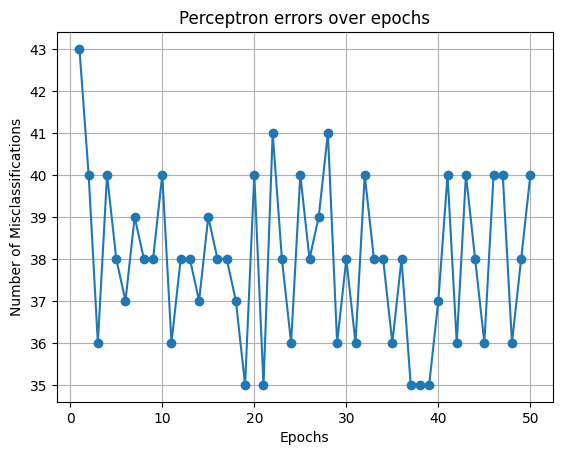

In [37]:
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.title('Perceptron errors over epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)

## Analysis
This displays how the Perceptron Learning Algorithm adjusts its weights during the training process. As the training progresses it attempted to minimize the errors however, the number of misclassifications does not decrease linearly. 

What does this mean?


The perceptron learning algorithm failed to converge when the data is not linearly seperable, which we have seen based on the pair plots. Since this data is not linear seperable, the algorithm is unable to find the hyperplane that separates the two classes. No matter how many iterations, it will not find a hyperplane that separates the two classes perfectly and find an optimal solution

In [21]:
predictions = ppn.predict(X_train)
print(f"Predictions: {predictions}")

Predictions: [1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 0 0 0 0 0 1]


## Model Performance
We were able to achieve an 89% accuracy with the perceptron learning algorithm. However. we would need a more complex model for better generalization.

In [23]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.89


## Training Errors from each epoch

In [22]:
print(f"Errors: {ppn.errors}")

Errors: [43, 40, 36, 40, 38, 37, 39, 38, 38, 40, 36, 38, 38, 37, 39, 38, 38, 37, 35, 40, 35, 41, 38, 36, 40, 38, 39, 41, 36, 38, 36, 40, 38, 38, 36, 38, 35, 35, 35, 37, 40, 36, 40, 38, 36, 40, 40, 36, 38, 40, 37, 40, 39, 35, 39, 40, 37, 35, 37, 37, 36, 37, 38, 33, 36, 38, 38, 40, 36, 40, 34, 38, 38, 38, 39, 35, 35, 39, 36, 36, 32, 35, 36, 39, 38, 36, 37, 37, 35, 37, 41, 38, 35, 42, 39, 37, 36, 38, 38, 35]
